<a href="https://colab.research.google.com/github/saqquib/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # **YES BANK STOCK CLOSING PRICE PREDICTION - SUPERVISED ML REGRESSION**





# **PROBLEM STATEMENT**

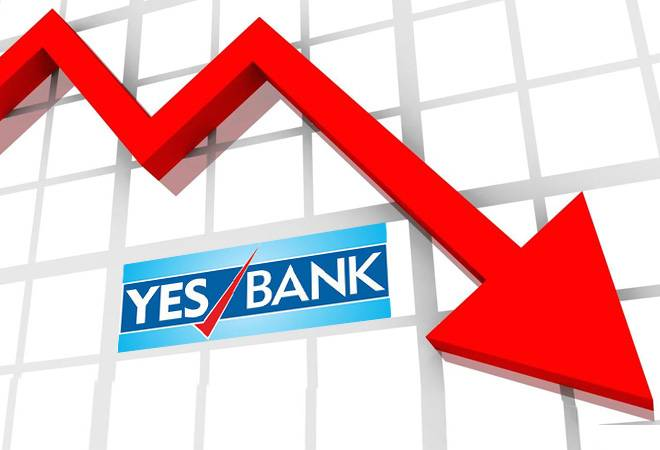

###Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month

### **Let's Get to know what is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

## **"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"**
We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

**Feature Engineering**:- Introducing New Variables, Dummy Variables

**Univariate Analysis**:- Distplot, Histogram, Barplot

**Bivariate Analysis**:- Boxplot, Heatmap,

**Introduced Models**:- Linear Regression, Lasso, Ridge, ElasticNet and XGBoost Regression

### Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.

In [1]:
# importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import math

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from scipy.stats import zscore

# **Importing and Loading data**

In [2]:
# Mounting the Drive first
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Loading and reading the dataset
df = pd.read_csv("/content/drive/My Drive/csv files caps2/data_YesBank_StockPrices.csv")

In [4]:
#Checking the head and tail of the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


# **Data Exploration**

In [6]:
# brief summary of the dataset
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [7]:
# details of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [8]:
df.shape

(185, 5)

In [9]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close']

### *   We have 5 columns and 185 rows in the dataset
### *   No null values
### *   Date column is of 'object' datatype we have to convert it to 'datetime'.




In [10]:
# convert string object to datetime object
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


## **Checking for Null values and Outliers**

In [12]:
# Checking Null Values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [13]:
#Looking for duplicates in dataset

len(df[df.duplicated()])

0

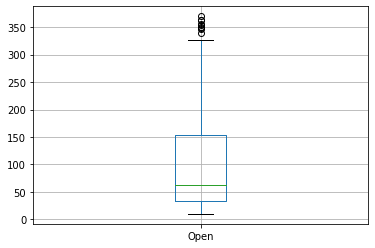

In [14]:
df.boxplot('Open')

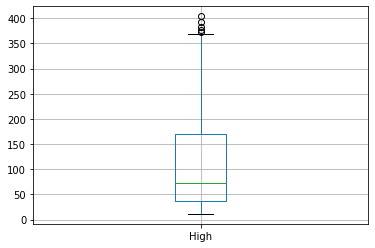

In [15]:
df.boxplot('High')

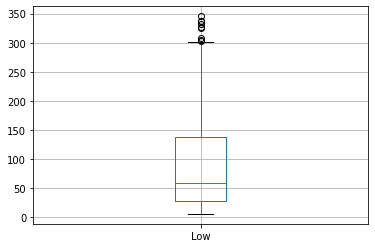

In [16]:
df.boxplot('Low')

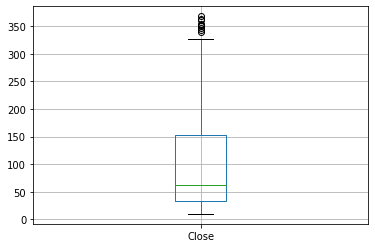

In [17]:
df.boxplot('Close')

Data preprocessing finished. Dataset is clean and ready for exploratory data analysis

# **Exploratory Data Analysis**

### **Visualising the data**

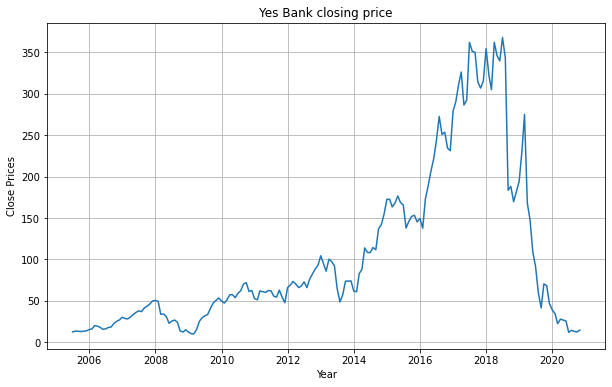

In [18]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

Closing price of stock price is always important so i take close price as dependent variable

**UNIVARIATE** **ANALYSIS**


---



---



### **Dependent variable [close price of stock]**

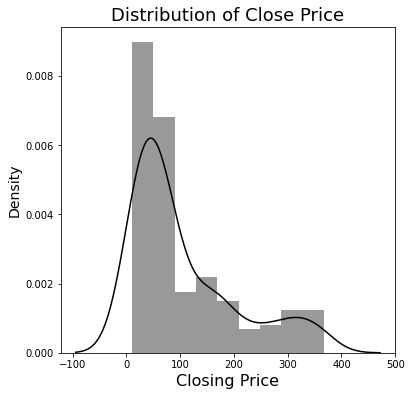

In [19]:
#Checking the distribution of our dependent variable 

plt.figure(figsize = (6,6))
sns.distplot(df['Close'], color = 'Black')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

The distribution of Stock Closing Price is rightly skewed distribution

To make it normal distribution apply **Log Transformation**

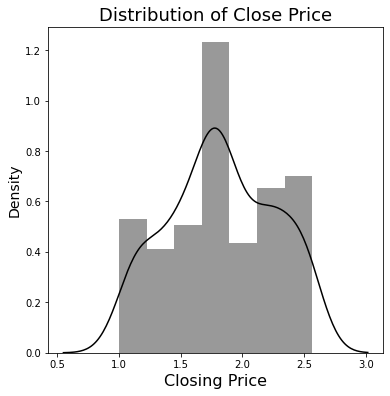

In [20]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Close']), color = 'Black')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

- After log transformation, distribution of closing price is more normal

**Independent Variable [Open , High and Low price of stock]**

Plotting distribution for numerical Features

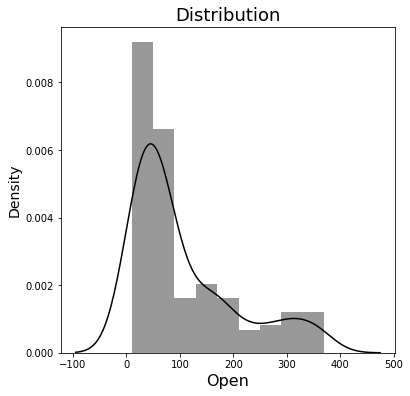

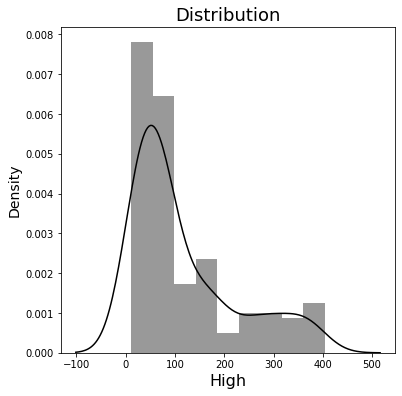

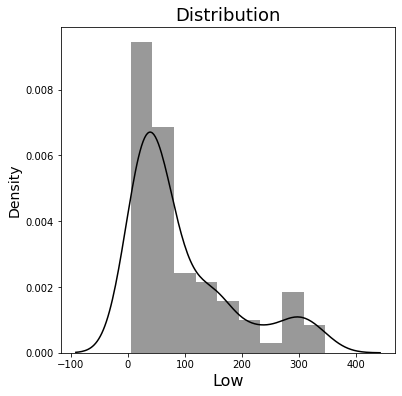

In [21]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Open'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['High'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Low'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

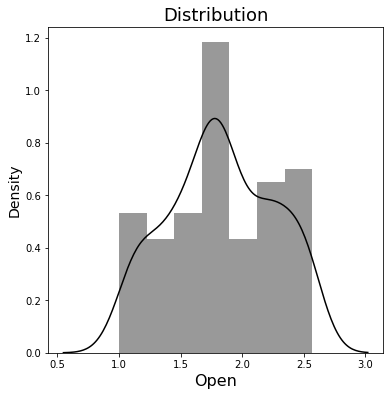

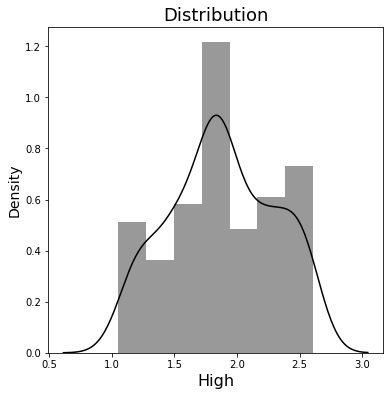

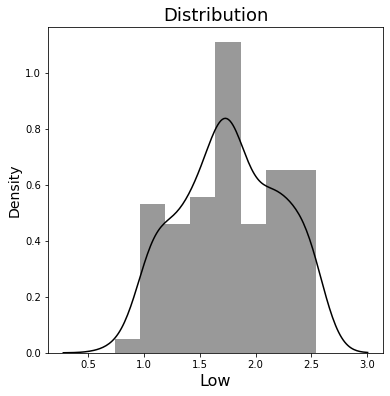

In [22]:
# Log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Open']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['High']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# Log Transformation of 'low' feature 
plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Low']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

**BIVARIATE ANALYSIS**

---



---



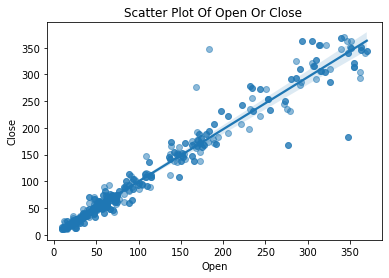

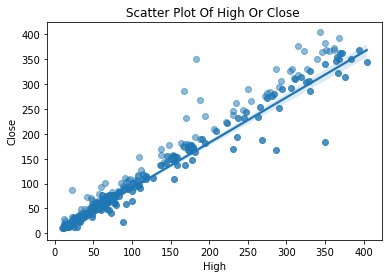

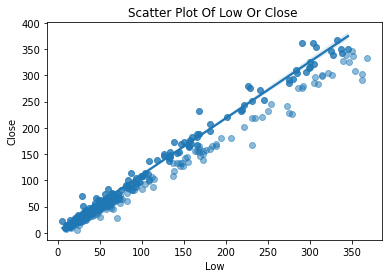

In [23]:
# scatter plot to see the relationship between dependent & independent variables

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)
plt.show()

### **Finding Correlation Between Variables**

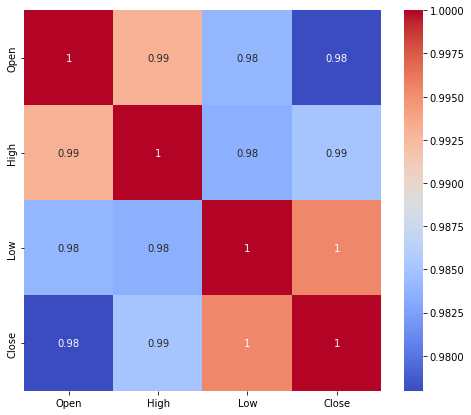

In [24]:
# Correaltion Between the Variables
corr = df.corr()
plt.figure(figsize = (8,7))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)


In [25]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [26]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important.

Before deleting any variable again we have to plot heatmap between independet variables and dependent variable to decide which variable we can drop

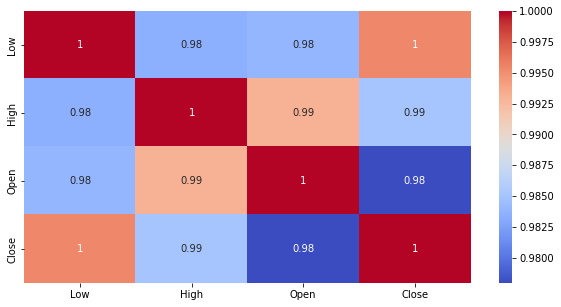

In [27]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Now,drop **Open** feature from the VIF matrix.

We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [28]:
# Here we will drop the open feature from the VIF matrix
calc_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


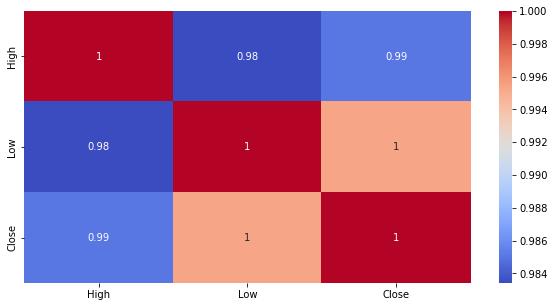

In [29]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

## **Splitting data in Train and Test**

Splitting of Data

X = Independent Variable

y = Dependent Variable

In [30]:
# Splitting data into Dependent and Independent Variables

X = df.drop(columns=['Close','Date'])
y = df['Close']

In [31]:
# Transformation of data
X = X.apply(zscore)
y = np.log10(y)

In [32]:
# splitting the dataset into the training set and test set with 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)      # Shape of the Training dataset
print(X_test.shape)       # Shape of the Test dataset

(148, 3)
(37, 3)


In [33]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)